# Análisis de fichero Multas.


##### Realizado por Araceli Macía Barrado
--------

Una vez que ya tengo el fichero con los datos, voy a leer y a analizar la información.


El planteamiento del ejercicio es contestar a las siguientes preguntas:
- ¿ Es verdad que los radares suponen el grueso de las multas?
- ¿ Cuantos tipos de agentes pueden poner una multa?
- ¿ Cuales son los lugares en los que con mas frecuencia hay multas?

Hay preguntas que no podemos contestar, por el ejemplo, siempre se ha dicho que la policia tiene que llegar a unos objetivos, y que si a mediados de mes no se van cumpliendo, se producen mas multas en las ultimas semanas. Dado que el ayuntamiento no facilita el dia, no es posible contrastar esta hipotesis.

Si ademas de esta información se tuviera:  el coste que supone los agentes de SER, RACE, Policia y Agentes de movilidad,  el coste que supone el mantenimiento de los radares, importe real facturado despues de descuentos o embargos con recargo, se podria hacer un estudio de como maximizar el beneficio,  comparando los margenes de cada tipo de Agente, los costes de los radares segun las infracciones detectadas, etc.

Otra cuestión, es que aunque el Ayuntamiento presume de Datos transparentes, la información que han publicado carece de :
- El mes de Febrero no esta publicado. 
- El Dia del Mes en que se ha puesto la multa. Curiosamente informan de la hora, pero no del dia. 
- Datos de Lugar no tipificados. Datos incompletos o inconexos.
- Hechos que producen la infraccion. No estan tipificados en su mayoria. 
- No informan de cuales son las multas que provienen de radares.


Otra cuestion a destacar, es que los datos que tenemos son todos discretos o categoricos. Es un dato importante a la hora de mostrar y graficar la información.  

-----------








In [1]:
#LECTURA DEL FICHERO E IMPORTACION DE LIBRERIAS.
%matplotlib inline 
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from pandas import read_hdf



In [2]:
dataTotal=pd.DataFrame()
dataTotal = read_hdf('multas/Multas2015.hdf5', "multas")

## A . Recaudación Multas 

A continuacion se presentan los siguientes datos.
- Importe total del año 2015.
- Importe segun la calificación de los Agentes.
- Importe recaudado por tipo de Multa ( la clasificación de tipo, ha sido segun mi criterio..)
- ¿ Se aplican siempre los descuentos ?
- Importe recaudado por tipo de Agentes.
- Importe por meses del año
- Importe por horas del dia.


#### 1. Importe Total del año 2015

In [3]:
print "El importe total de multas en 2015 fue de : ", dataTotal.IMP_BOL.sum()

El importe total de multas en 2015 fue de :  189188500.0


El importe es muy elevado, lamentablemente no tenemos informacion de cual es el importe real que ingresa el Ayuntamiento, puesto que no sabemos si se han aplicado o no los descuentos ( en que medida) o de si se han producido embargos por impagos con el correspondiente recargo.

Segun las noticias que he buscado del tema, durante el 2016 el Ayuntamiento ha aumentado la recaudación con respecto al año 2015,  y preven un aumento para el año 2017..

#### 2. Importe segun la calificación de los Agentes.


In [4]:
print "---- Numero de Multas por Calificacion"
print dataTotal.groupby(['CALIFICACION'])['IMP_BOL'].count()
print "---- Importe Medio de Multas por Calificacion"
print dataTotal.groupby(['CALIFICACION'])['IMP_BOL'].mean()
print "---- Importe Total de Multas por Calificacion"
print dataTotal.groupby(['CALIFICACION'])['IMP_BOL'].sum()
print "....."
print "El rango de importes LEVES : ", dataTotal[dataTotal.CALIFICACION=="LEVE"]["IMP_BOL"].unique()
print "El rango de importes GRAVE : ", dataTotal[dataTotal.CALIFICACION=="GRAVE"]["IMP_BOL"].unique()
print "El rango de importes MUY GRAVE : ",dataTotal[dataTotal.CALIFICACION=="MUY GRAVE"]["IMP_BOL"].unique()

---- Numero de Multas por Calificacion
CALIFICACION
GRAVE         527021
LEVE         1386318
MUY GRAVE       8162
Name: IMP_BOL, dtype: int64
---- Importe Medio de Multas por Calificacion
CALIFICACION
GRAVE        148.195802
LEVE          75.675062
MUY GRAVE    756.738544
Name: IMP_BOL, dtype: float64
---- Importe Total de Multas por Calificacion
CALIFICACION
GRAVE         78102300.0
LEVE         104909700.0
MUY GRAVE      6176500.0
Name: IMP_BOL, dtype: float64
.....
El rango de importes LEVES :  [  90.   30.   60.  100.]
El rango de importes GRAVE :  [ 200.  400.  300.  100.  500.]
El rango de importes MUY GRAVE :  [  500.  1000.]


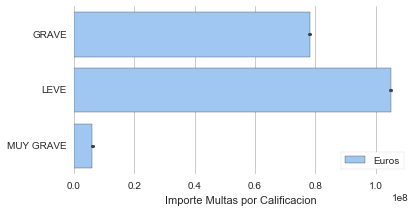

In [5]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 3))


sns.set_color_codes("pastel")
sns.barplot(x="IMP_BOL", y="CALIFICACION", estimator=sum, data=dataTotal,
            label="Euros", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 110909700), ylabel="",
       xlabel="Importe Multas por Calificacion")
sns.despine(left=True, bottom=True)

Las multas que mas se producen son las que se califican como LEVES, sin embargo el importe de esas multas es inferior a los importes de las multas GRAVES o MUY GRAVES.  Aun así,  las calificadas como LEVES son las que mas recaudan.

In [6]:
#Preparacion de datos para mostrar en graficos los importes segun la CALIFICACION.
total1=pd.crosstab([dataTotal.IMP_BOL], [dataTotal.CALIFICACION], values=dataTotal.IMP_BOL, aggfunc=[np.max])
total1.columns.names=["CALIFICACION", ""]

vista=dataTotal[dataTotal.IMP_BOL==100] #ZOOM sobre los importes de 100 euros
total2=pd.crosstab([vista.IMP_BOL], [vista.CALIFICACION], values=vista.IMP_BOL, aggfunc=[len])
total2.columns.names=["CALIFICACION", ""]

vista2=dataTotal[dataTotal.IMP_BOL==500] #ZOOM sobre los importes de 500 euros.
total3=pd.crosstab([vista2.IMP_BOL], [vista2.CALIFICACION], values=vista.IMP_BOL, aggfunc=[len])
total3.columns.names=["CALIFICACION", ""]

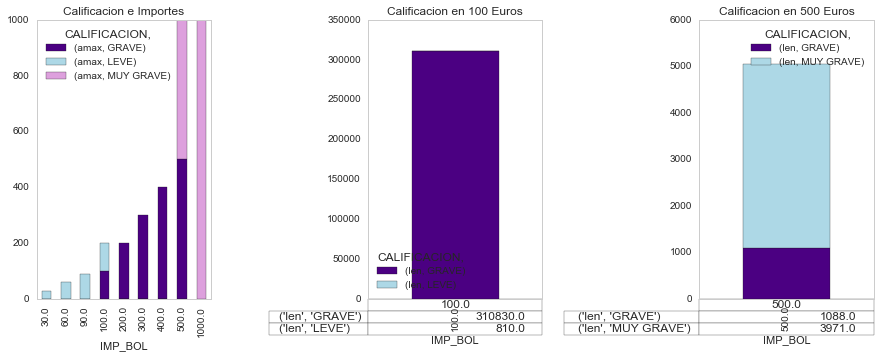

In [7]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.9, hspace=0.5);

total1.plot(kind='bar', ax=axes[0], stacked=True, legend="True",\
          color=['indigo','lightblue','plum'], grid=False,\
         title="Calificacion e Importes")
total2.plot(kind='bar',ax=axes[1], stacked=True, legend="True",\
          color=['indigo','lightblue','plum'], grid=False,table=True,\
         title="Calificacion en 100 Euros")
total3.plot(kind='bar', ax=axes[2], stacked=True, legend="True", table=True,\
          color=['indigo','lightblue','plum'], grid=False,\
         title="Calificacion en 500 Euros")

Estos graficos son para mostrar la clasificacion del rango de los importes de las multas segun la Clasificación, puesto que dado que hay unas CALIFICACIONES, en principio seria entendible que cada clasificación tuviera un rango de importes de multas, pero parece que no es asi.

Existe cierto solapamiento entre el rango de los importes y la CALIFICACION de las multas..  Parece que no estan los limites claros, por ejemplo una multa con importe de 500, puede ser calificada como GRAVE o MUY GRAVE..  

Examinado los datos mas en detalle, en las multas de 100 euros, hay muy pocas multas con calificacion LEVE, por lo que quizas podriamos considerar que esas multas se deben a un error humano a la hora de calificar.  Sin embargo en las multas de 500 euros, aunque tambien podriamos decir que la Calificacion predominante es MUY GRAVE, el numero de multas GRAVES es alrededor de un 25%. 

Vamos a hacer zoom en las multas de 500 euros calificadas como GRAVES en vez de MUY GRAVES:

In [8]:
vista4=dataTotal[dataTotal.IMP_BOL==500] #ZOOM sobre los importes de 500 euros.
total4=pd.crosstab([vista4.TIPO], [vista4.CALIFICACION], values=vista4.IMP_BOL, aggfunc=[len])
total4

len          
CALIFICACION    GRAVE MUY GRAVE
TIPO                           
CIRCULACION       NaN    1576.0
DESOBEDIENCIA     NaN      33.0
DROGAS            NaN    2183.0
ESTACIONAR        NaN       4.0
OTROSVEH          NaN      15.0
PEATON            NaN       8.0
SEMAFORO          NaN      50.0
TROMPOS           NaN      35.0
VAR_TEMERARIA     NaN       1.0
VELOCIDAD      1088.0      66.0

Es decir las multas GRAVES con importe de 500€ corresponden en su totalidad a multas de velocidad.
Entonces, el solape del importe de las multas en 500€ entre graves y muy graves corresponde a que las multas por exceso de velocidad se califican como GRAVES, y el importe corresponde una calificacion de MUY GRAVE. 

Vamos a ver la diferencia de HECHOS, a ver si es posible ver la diferencia de estas CALIFICACIONES:

In [9]:
print dataTotal[(dataTotal.IMP_BOL==500) & (dataTotal.TIPO=="VELOCIDAD") & \
                                      (dataTotal.CALIFICACION=="GRAVE")]["HECHO"].unique()

print "--------"
print dataTotal[(dataTotal.IMP_BOL==500) & (dataTotal.TIPO=="VELOCIDAD") & \
                                      (dataTotal.CALIFICACION=="MUY GRAVE")]["HECHO"].unique()[1:15]


[ 'SOBREPASAR LA VELOCIDADM\xc3\x81XIMA EN V\xc3\x8dAS LIMITADAS HASTA 50KM/H.'
 'SOBREPASAR LA VELOCIDADM\xc3\x81XIMA EN V\xc3\x8dAS LIMITADAS EN 60 KM/H O M\xc3\x81S.']
--------
['CONDUCCION TEMERARIA: CONDUCIR ZIC ZAC'
 'CONDUCCION TEMERARIA: CONDUCE A GRAN VELOCIDAD POR ZONA ESCOLAR'
 'CONDUCCION TEMERARIA: HACIENDO ZIG ZAG A GRAN VELOCIDAD'
 'CONDUCCION TEMERARIA: A GRAN VELOCIDAD ZIG ZAG INCUMPLIENDO SE\xc3\x91ALIZACION'
 'CONDUCCION TEMERARIA: CIRCULAR A GRAN VELOCIDAD GIRAN DE FORMA PROHIBIDO'
 'CONDUCCION TEMERARIA: CIRCULAR A GRAN VELOCIDAD EN ZIG ZAG'
 'CONDUCCION TEMERARIA: CIRCULAR A GRAN VELOCIDAD CON PELIGRO PARA LOS AGENTES'
 'CONDUCCION TEMERARIA: GIRO IZDA GRAN VELOCIDAD SIN CEDER PASO CON ACCIDENTE'
 'CONDUCCION TEMERARIA: CIRCULAR GRAN VELOCIDAD EN ZIG ZAG ATRAVESAR L CONTINUA'
 'CONDUCCION TEMERARIA: CONDUCIR CON UN BEBE DE MESES ENTRE VOLANTA Y BRAZOS'
 'CONDUCCION TEMERARIA: VELOCIDAD SUPERIOR A 120 KM H ZIGZAGUEANDO ENTRE VIAS'
 'CONDUCCION TEMERARIA: MOTOCICLET

Curiosamente,  las 1088 multas GRAVES corresponden solamente a dos tipos de Hechos, sobrepasar la velocidad en vias de 50 y 60 km/hora.  Y las de MUY GRAVE son de velocidad acompañada por comportamiento temerario. Aunque hay algunas que podrian ser subjetivas, por ejemplo "CONDUCIR A GRAN VELOCIDAD"... podria corresponder a una de las SOBREPASAR..
Es decir,  el limite para definir una CLASIFICACION , no veo que sea objetivo.

Vamos a ver quien pone estas multas.

In [10]:
vista5=dataTotal[(dataTotal.IMP_BOL==500) & (dataTotal.TIPO=="VELOCIDAD") ] #ZOOM sobre los importes de 500 euros.
total5=pd.crosstab([vista5.DENUNCIANTE], [vista5.CALIFICACION], values=vista5.IMP_BOL, aggfunc=[len])
total5

len          
CALIFICACION           GRAVE MUY GRAVE
DENUNCIANTE                           
AGENTES DE MOVILIDAD    18.0       NaN
POLICIA MUNICIPAL     1070.0      66.0

In [11]:
#hechos descritos en multas de Agentes de movilidad.
print dataTotal[(dataTotal.IMP_BOL==500) & (dataTotal.TIPO=="VELOCIDAD") & \
                                      (dataTotal.CALIFICACION=="GRAVE") & \
                                     (dataTotal.DENUNCIANTE=="AGENTES DE MOVILIDAD")]["HECHO"].unique()

print "----"
#Hechos descritos en multas de Policia Municipal.
print dataTotal[(dataTotal.IMP_BOL==500) & (dataTotal.TIPO=="VELOCIDAD") & \
                                      (dataTotal.CALIFICACION=="GRAVE") & \
                                     (dataTotal.DENUNCIANTE=="POLICIA MUNICIPAL")]["HECHO"].unique()



[ 'SOBREPASAR LA VELOCIDADM\xc3\x81XIMA EN V\xc3\x8dAS LIMITADAS HASTA 50KM/H.']
----
[ 'SOBREPASAR LA VELOCIDADM\xc3\x81XIMA EN V\xc3\x8dAS LIMITADAS HASTA 50KM/H.'
 'SOBREPASAR LA VELOCIDADM\xc3\x81XIMA EN V\xc3\x8dAS LIMITADAS EN 60 KM/H O M\xc3\x81S.']


Es decir, que los Agentes de Movilidad ponen multas con la CALIFICACION de GRAVE y siempre con el mismo HECHO.
La POLICIA MUNICIPAL sin embargo cambian la calificación y el hecho.

Hay que tener en cuenta que el fichero no especifica cuando las multas corresponden a las multas que provienen de RADARES..   Con lo cual, no se encuentra una explicación clara a la diferencia de criterio para CALIFICAR.

 #### 3. Importes por el tipo de multa


In [12]:
total=pd.crosstab([dataTotal.CALIFICACION], [dataTotal.TIPO], values=dataTotal.IMP_BOL, aggfunc=[np.sum],margins=True)
total.T

CALIFICACION              GRAVE         LEVE  MUY GRAVE          All
    TIPO                                                            
sum CIRCULACION       2060800.0   24170460.0   788000.0   27019260.0
    DESOBEDIENCIA      143800.0      15030.0    16500.0     175330.0
    DROGAS                  NaN          NaN  5282500.0    5282500.0
    ESTACIONAR       28469400.0   80578860.0     2000.0  109050260.0
    OTROSVEH             1800.0       7560.0     7500.0      16860.0
    PEATON              83400.0      80340.0     4000.0     167740.0
    SEMAFORO          4042600.0       4230.0    25000.0    4071830.0
    TROMPOS             10600.0       5160.0    17500.0      33260.0
    VAR_NEGLIGENCIA   1813200.0      20130.0        NaN    1833330.0
    VAR_TEMERARIA      315000.0      27840.0      500.0     343340.0
    VELOCIDAD        41161700.0         90.0    33000.0   41194790.0
    All              78102300.0  104909700.0  6176500.0  189188500.0

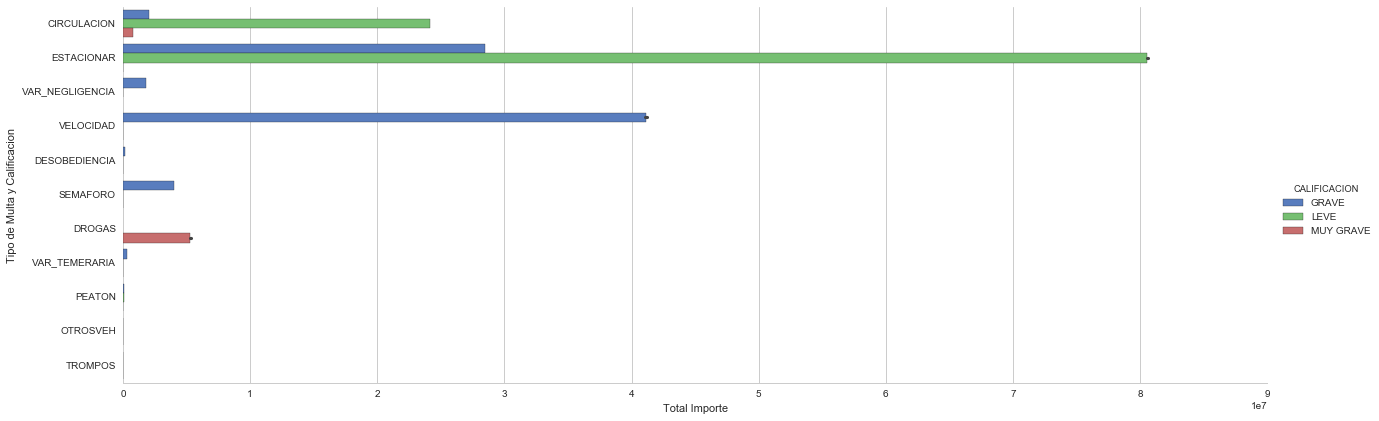

In [13]:
sns.set(style="whitegrid")
g = sns.factorplot(x="IMP_BOL", y="TIPO", hue="CALIFICACION", estimator=sum, data=dataTotal, 
                   size=6,aspect=3, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Tipo de Multa y Calificacion")
g.set_xlabels("Total Importe")

Con estos datos podemos visualizar la distribucion de los importes segun la calificacion y el tipo.
Como vemos las infracciones de tipo DROGAS estan siempre calificadas como MUY GRAVE, y las de estacionar mayormente de tipo LEVE. 
En el grafico se muestra el Importe Por Tipo y Calificacion, y se ve claramente que el grueso de la recaudacion se produce con las multas por **Estacionamiento.**

### 4. ¿ Se aplican siempre los descuentos ?

In [14]:
print "Numero de Multas con descuentos ", dataTotal[dataTotal.DESCUENTO=="SI"].ANIO.count()
print "Numero de Multas sin Descuento ", dataTotal[dataTotal.DESCUENTO=="NO"].ANIO.count()


Numero de Multas con descuentos  1921500
Numero de Multas sin Descuento  1


Solo hay una multa SIN descuento en todo el conjunto de datos!!

In [15]:
dataTotal[dataTotal.DESCUENTO=="NO"]


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO,VEL_LIMITE,VEL_CIRCULA,DHORA,TIPO,TRAMOHORA
670857,LEVE,M 30 TUNEL 18XC12,5,2015,03:30,100.0,NO,0,POLICIA MUNICIPAL,NO INSTALAR SEÑALIZACIÓN DE OBRAS O HACERLO IN...,0,0,2016-01-01 03:30:00,VAR_TEMERARIA,00


In [16]:
print dataTotal.ix[670857]["HECHO"]


NO INSTALAR SEÑALIZACIÓN DE OBRAS O HACERLO INCORRECTAMENTE PONIENDO EN GRAVE RIESGO LA SEGURIDAD VIAL.


Solo hay una multa sin descuento.. ¿¿ quizas podria ser que han puesto la multa a operarios en una obra de la M30?

### 5. Importe recaudado por tipo de Agentes.

Los tipos de Agente que se encuentran en el fichero que pueden poner multas son los siguientes;
- Policia municipal
- SACE : Servicio de Control de los Carriles-Bus
- SER : Servicio de Estacionamiento Regulado (SER) 
- Agentes de Movilidad: Ayudan a la Policia Municipal, pero son funcionarios, no policias.

Como he comentado anteriormente, no indican de que tipo son las multas que provienen de los radares.


In [17]:
print dataTotal.groupby(['DENUNCIANTE'])['IMP_BOL'].sum() 


DENUNCIANTE
AGENTES DE MOVILIDAD    35358930.0
POLICIA MUNICIPAL       67802170.0
SACE                     3184860.0
SER                     82842540.0
Name: IMP_BOL, dtype: float64


Se puede ver en los datos, que los que mas recaudan son los de SER, que como ya vimos en la informacion anterior, corresponde con las multas de Estacionamiento.  A continuacion veremos detalle del tipo de multa por denunciante.

In [18]:
total=pd.crosstab([dataTotal.TIPO],[dataTotal.DENUNCIANTE],  values=dataTotal.IMP_BOL, aggfunc=[np.sum],margins=True)
total

sum                                           \
DENUNCIANTE     AGENTES DE MOVILIDAD POLICIA MUNICIPAL       SACE         SER   
TIPO                                                                            
CIRCULACION               24551490.0         2449770.0    18000.0         NaN   
DESOBEDIENCIA                47960.0          127370.0        NaN         NaN   
DROGAS                       16500.0         5266000.0        NaN         NaN   
ESTACIONAR                 6575110.0        16465750.0  3166860.0  82842540.0   
OTROSVEH                      2420.0           14440.0        NaN         NaN   
PEATON                       40190.0          127550.0        NaN         NaN   
SEMAFORO                   3066300.0         1005530.0        NaN         NaN   
TROMPOS                        480.0           32780.0        NaN         NaN   
VAR_NEGLIGENCIA             452480.0         1380850.0        NaN         NaN   
VAR_TEMERARIA                31600.0          311740.0        NaN         NaN   
VELOCIDAD                   574400.0        40620390.0        NaN         NaN   
All                       35358930.0        67802170.0  3184860.0  82842540.0   

                              
DENUNCIANTE              All  
TIPO                          
CIRCULACION       27019260.0  
DESOBEDIENCIA       175330.0  
DROGAS             5282500.0  
ESTACIONAR       109050260.0  
OTROSVEH             16860.0  
PEATON              167740.0  
SEMAFORO           4071830.0  
TROMPOS              33260.0  
VAR_NEGLIGENCIA    1833330.0  
VAR_TEMERARIA       343340.0  
VELOCIDAD         41194790.0  
All              189188500.0

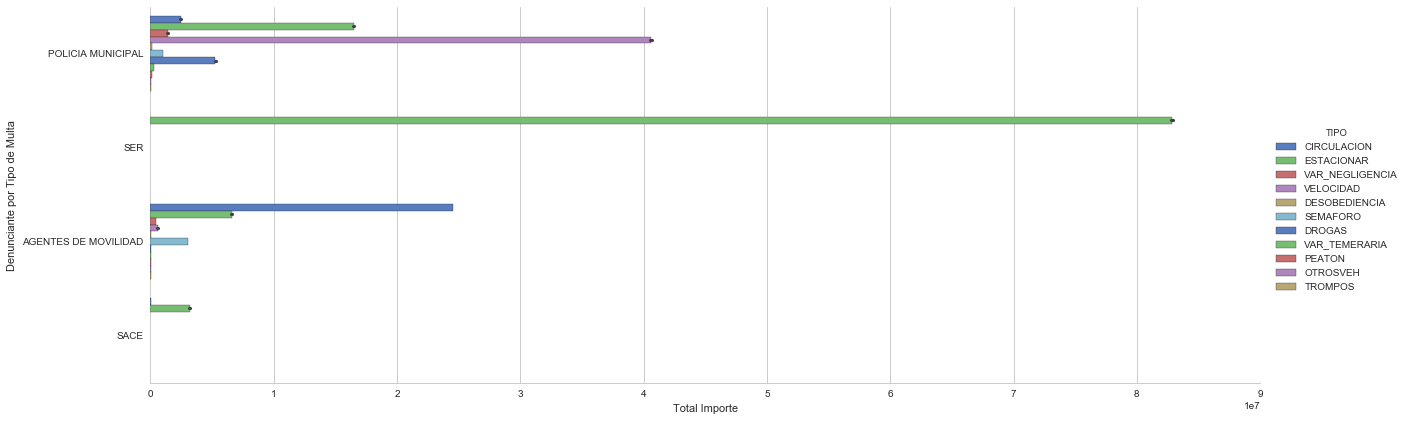

In [19]:
sns.set(style="whitegrid")
g = sns.factorplot(x="IMP_BOL", y="DENUNCIANTE", hue="TIPO", estimator=sum, data=dataTotal, 
                   size=6,aspect=3, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Denunciante por Tipo de Multa")
g.set_xlabels("Total Importe")

Los que mas recaudan son la SER en tipo Estacionar ( son las multas LEVES que veiamos en el apartado anterior).
En este punto, si tuvieramos el dato de las recaudaciones de SER, y el coste que tienen ( personal, mantenimiento de maquinas..), Puntos de Ubicacion... se podria llegar a analizar el margen obtenido y revisar para posibles optimizaciones. Tambien faltaria el dato de la recaudacion que se hace en las maquinas de la hora, de la gente que paga por aparcar. 

La policia Municipal pone multas de todo tipo, pero las mas frecuentes son las de Velocidad (puede que aqui se engloben las de los radares). Tambien ponen bastante multas relacionadas con el Estacionamiento.

Los Agentes de movilidad destacan por el numero de multas de Circulación.

### 6. Importe por meses del año


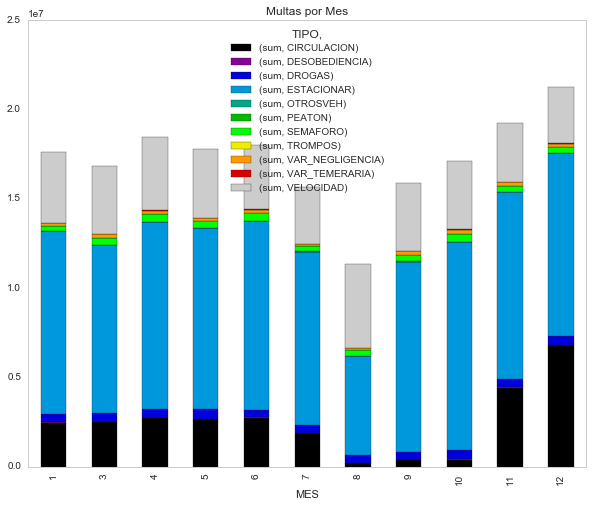

In [20]:
total=pd.crosstab([dataTotal.MES], [dataTotal.TIPO], values=dataTotal.IMP_BOL, aggfunc=[np.sum])
total.columns.names=["TIPO", ""]
total.plot(kind='bar', figsize=(10,8) ,stacked=True,legend="True",\
           cmap='nipy_spectral', grid=False,\
           title="Multas por Mes")


A falta de datos de otros años para comparar, se aprecia estacionalidad en el numero de multas. En los meses de Julio y Septiembre hay menos multas, siendo Agosto el mes con menos multas. Y luego los meses con mas multas son los de Noviembre y Diciembre, que a priori , podría  coincidir con la epoca de inicio de compras navideñas y celebraciones.
Pero llama la atención que una razon de que las multas se disparen en Diciembre sea por el aumento de multas en Circulación.
Otro mito que cae, las multas por DROGA ( incluye alcoholemia), no se disparan en Noviembre y Diciembre, lo que me da a entender que la gente esta mas concienciada en cuanto a beber y conducir, y que el aumento de controles parece que funciona.

En Agosto aunque las multas disminuyen, se aprecia que hay un aumento en cuanto a las multas de Velocidad.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x191dfc190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1d24d2790>], dtype=object)

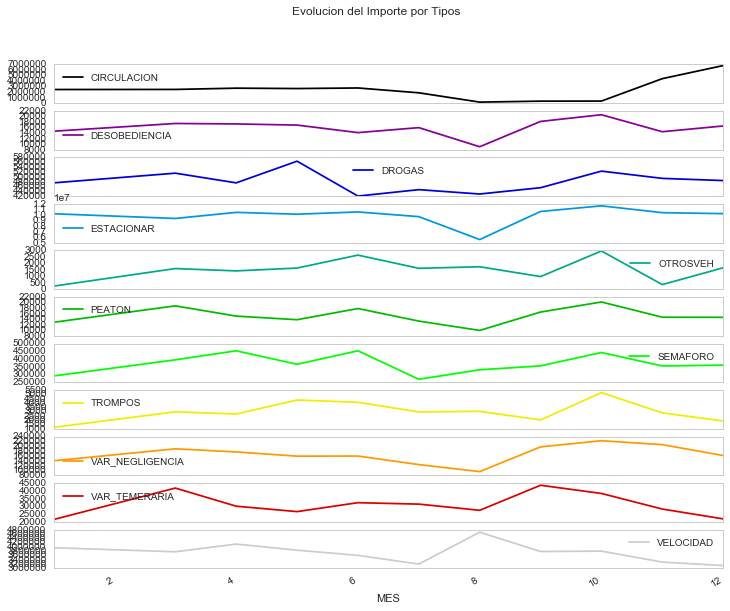

In [21]:

te1=dataTotal[dataTotal.TIPO=="CIRCULACION"].groupby("MES")
te2=dataTotal[dataTotal.TIPO=="DESOBEDIENCIA"].groupby("MES")
te3=dataTotal[dataTotal.TIPO=="DROGAS"].groupby("MES")
te4=dataTotal[dataTotal.TIPO=="ESTACIONAR"].groupby("MES")
te5=dataTotal[dataTotal.TIPO=="OTROSVEH"].groupby("MES")
te6=dataTotal[dataTotal.TIPO=="PEATON"].groupby("MES")
te7=dataTotal[dataTotal.TIPO=="SEMAFORO"].groupby("MES")
te8=dataTotal[dataTotal.TIPO=="TROMPOS"].groupby("MES")
te9=dataTotal[dataTotal.TIPO=="VAR_NEGLIGENCIA"].groupby("MES")
te10=dataTotal[dataTotal.TIPO=="VAR_TEMERARIA"].groupby("MES")
te11=dataTotal[dataTotal.TIPO=="VELOCIDAD"].groupby("MES")

totImportes = {
    "CIRCULACION" : te1["IMP_BOL"].sum(),
    "DESOBEDIENCIA" :te2["IMP_BOL"].sum(),
    "DROGAS" : te3["IMP_BOL"].sum(),
    "ESTACIONAR":te4["IMP_BOL"].sum(),
    "OTROSVEH": te5["IMP_BOL"].sum(),
    "PEATON":te6["IMP_BOL"].sum(),
    "SEMAFORO": te7["IMP_BOL"].sum(),
    "TROMPOS":te8["IMP_BOL"].sum(),
    "VAR_NEGLIGENCIA" : te9["IMP_BOL"].sum(),
    "VAR_TEMERARIA":te10["IMP_BOL"].sum(),
    "VELOCIDAD" :te11["IMP_BOL"].sum()  
}

pImp=pd.DataFrame(totImportes)
pImp.plot(kind="line", subplots=True, grid=False ,\
          cmap='nipy_spectral', figsize=(12, 10), legend=True, title="Evolucion del Importe por Tipos ")


Viendo mas en detalle la evolucion por separado de cada tipo de multa.  
Las multas de **Circulacion**, estan estables durante el primer semestre, en los meses de verano empiezan a caer, y sin embargo una vez que llega el mes de Octubre crecen considerablemente.  Habria que ver cual es el detalle de esos Hechos,a continuacion vamos a analizarlo.

Las multas de **Desobedicencia**, tambien son estables, hasta que llega el mes de Septiembre y Octubre y se disparan.

Las multas de **Drogas**, curiosamente no sobresalen en los meses de Noviembre y Diciembre, que con motivo de las celebraciones navideñas siempre hay mas controles. Sin embargo en el mes de Mayo repuntaron. Habria que ver que pasó en Mayo, a que se debio este repunte.

Las multas de **estacionamiento**, son estables, solo demuestran que en Agosto, mes de vacaciones, bajan, que es normal si pensamos que Madrid se queda "vacio". tambien imagino que los agentes de la SER estaran de vacaciones, por lo que habrá menos control, que se puede ver reflejado en el número de multas.

Las multas de **Otros Vehiculos**, tambien se observa paron en los meses de Verano, pero luego sube en Octubre.  A falta de verlo con datos en detalle, en los datos se ve que en Octubre bajan las multas de Circulacion y suben las de OTROSVEH, donde tenemos las referentes a MOTOS.  Igual que se observa que a partir de mayo aumentan las multas de Otros VEH, asi, sin datos, puede ser que con el buen tiempo, hay mas transito de MOTOS que de vehiculos.

Las incidencias con **Peatones**, pasos de peatones, zonas peatonales, casi-atropellos, tampoco se mantiene constante, con varios picos, siendo el de Octubre el mas destacado.

Los **trompos**, que engloban trompo, caballitos, hacer ruedas.. etc.. tambien empiezan a subir en Mayo, ñuego empiezan a descender en Agosto, pero curiosamente en Octubre suben.

Las varias de **Negligenia** tambien se mantienen constantes, con su decremento en agosto, y luego suben en Octubre.

Y las de **Velocidad** , llevan la evolucion al reves que el resto, en el mes de Agosto se disparan.


Sin mas datos, en principio me resulta curiosos que todas los tipos lleven un ritmo mas o menos constante hasta el verano, y que despues del verano las multas empiecen a subir..  harian falta las multas de otros años para ver tendencias, pero, a priori podria ser que la gente despues de las vacaciones comete mas infracciones, o bien, los Agentes vuelven mas atentos, para compensar la caida economica del verano.


------------
### 7. Importe por tramos horarios 

Los tramos horarios que he tipificado son : 
0: de 0 a 6h, 06: de 6-8h, 08: 08-10h, 10: 10-12h, 12: 12-14h , 14: 14-16h,
16: 16-18h, 18:18-21h, 21:21-23h 


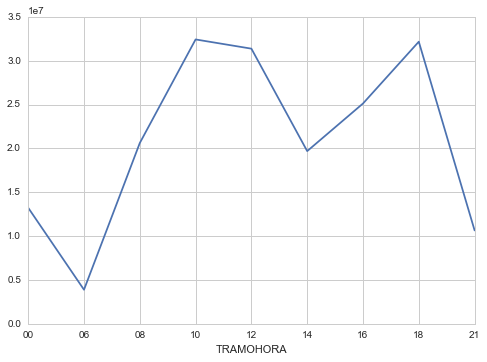

In [22]:
porHoras= dataTotal.groupby(['TRAMOHORA'])['IMP_BOL'].sum()
porHoras.plot(kind='line');

No existe una distribucion normal de las multas por tramo horario.  Se puede ver que el numero de infracciones viene dado por el comportamiento y rutinas diarias, horas de sueño, horas de comida, hora de salida y regreso del trabajo..


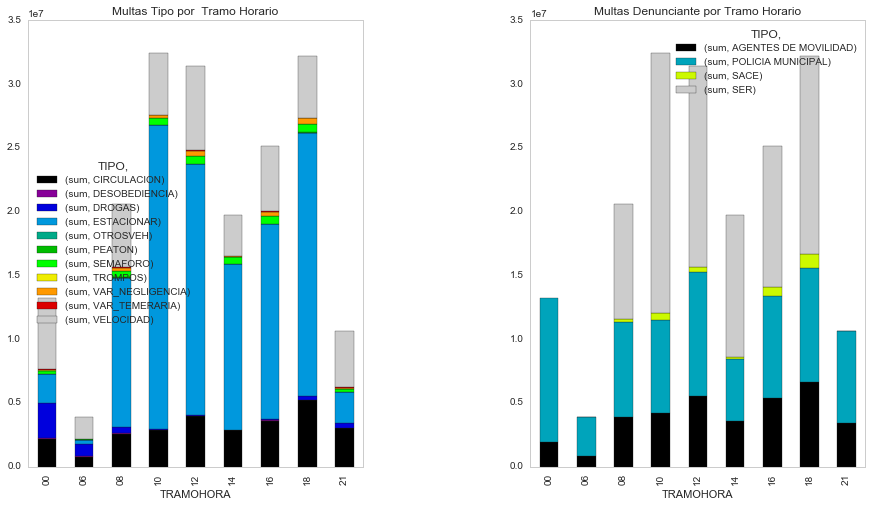

In [23]:
fig,axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5);

total=pd.crosstab([dataTotal.TRAMOHORA], [dataTotal.TIPO], values=dataTotal.IMP_BOL, aggfunc=[np.sum])
total.columns.names=["TIPO", ""]
total.plot(kind='bar', figsize=(15,8) , ax=axes[0], stacked=True,legend="True",\
           cmap='nipy_spectral', grid=False, title="Multas Tipo por  Tramo Horario")

total1=pd.crosstab([dataTotal.TRAMOHORA], [dataTotal.DENUNCIANTE], values=dataTotal.IMP_BOL, aggfunc=[np.sum])
total1.columns.names=["TIPO", ""]
total1.plot(kind='bar', figsize=(15,8) , ax=axes[1], stacked=True,legend="True",\
           cmap='nipy_spectral', grid=False, title="Multas Denunciante por Tramo Horario")


Segun vemos en la grafica, los tramos con mayor volumen de multas es de 10 a 14 y de 18 a 21. Y el que menos es de 6 a 8 de la mañana, suponemos que a esa hora nocturna es cuando menos gente hay en movimiento.

Las infracciones por Drogas cuando mas se producen es de 12 a 6 de la mañana.
Las de estacionamiento cuando mas se producen es de 10 12 de la mañana, aunque se ve en la grafica, que existen durante todo el dia, ya que aparte de la SER y SACE tambien las ponen la Policia Municipal ( como vimos en graficas anteriores).
Curioso, que no existen infracciones de Semaforos de 6 a 8 de la mañana.

Las multas de Circulacion sufren un aumento de 18 a 21 horas, que coincide con los horarios de vuelta del trabajo.

Viendo los datos por tipo de denunciante, podemos llegar a ver el horario de SER y SACE, desde las 8 de la mañana hasta las 21 de la noche estan trabajando para controlar el estacionamiento. 



Como resumen de este apartado, podemos decir:
1. Las infracciones que mas cometen los madrileños son las Estacionamiento.  
2. En los meses de Verano, hay menos infracciones.
3. Los meses que mas infracciones se comete son los meses Octubre a  Diciembre.
4. Los Agentes que mas multas ponen son las de SER. 
5. Las horas donde mas infracciones se comenten son entre las 10 y las 12, y de 18 a 21 horas. 

---------------

## Puntos de Carnet

Vamos a analizar ahora, la retirada de puntos de Carnet.

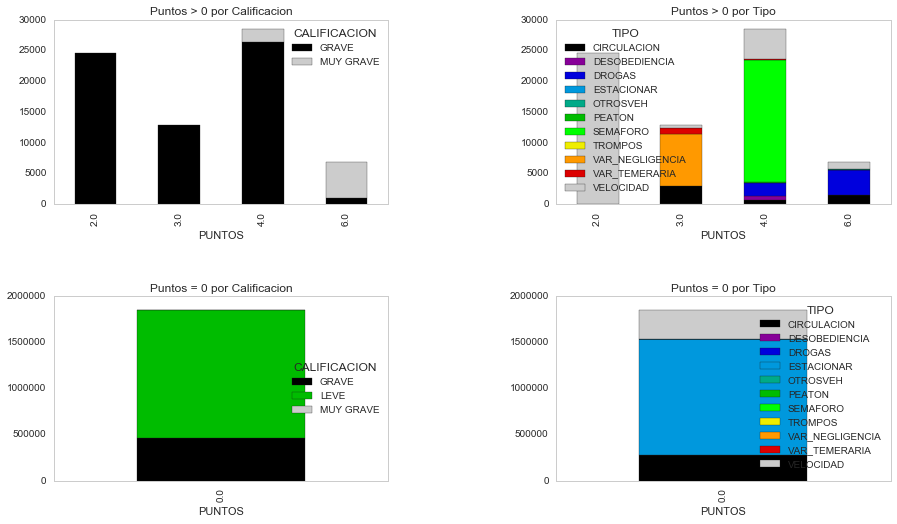

In [24]:

fig,axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5,bottom=0.1, top=0.9);


total1=pd.crosstab(dataTotal[dataTotal.PUNTOS>0].PUNTOS, [dataTotal.CALIFICACION], aggfunc=[len] )

total1.plot(kind='bar',figsize=(15, 8),  ax=axes[0,0], stacked=True,legend="True",\
           cmap='nipy_spectral', grid=False, \
           title="Puntos > 0 por Calificacion")


total2=pd.crosstab(dataTotal[dataTotal.PUNTOS>0].PUNTOS, [dataTotal.TIPO], aggfunc=[len] )
total2.plot(kind='bar', ax=axes[0,1] ,stacked=True,legend="True",\
           cmap='nipy_spectral', grid=False,\
           title="Puntos > 0 por Tipo")


total3=pd.crosstab(dataTotal[dataTotal.PUNTOS==0].PUNTOS, [dataTotal.CALIFICACION], aggfunc=[len] )
total3.plot(kind='bar',figsize=(15, 8),  ax=axes[1,0], stacked=True,legend="True",\
           cmap='nipy_spectral', grid=False, \
           title="Puntos = 0 por Calificacion")


total4=pd.crosstab(dataTotal[dataTotal.PUNTOS==0].PUNTOS, [dataTotal.TIPO], aggfunc=[len] )
total4.plot(kind='bar', ax=axes[1,1] ,stacked=True,legend="True",\
           cmap='nipy_spectral', grid=False,\
           title="Puntos = 0 por Tipo")


En estas graficas se puede ver que no existe una relacion clara en la retirada de puntos de carnet con el tipo y con la Calificación. Lo que me hace dudar de la calidad del dato, o bien esta mal recogido, o bien esta bien recogido, pero la retirada de puntos no llegar a ser del todo objetiva. Esto es lo que vimos en el apartado de las CALIFICACIONES y los importes, que parece que no existe unas reglas claras.

Por ejemplo, en el primer grafico vermos que la retirada de 4 y 6 puntos se solapan en algunos datos con las calificaciones de Grave y Muy Grave ( habria que analizar mas en detalle revisando los HECHOS a que son debido esos solapamientos). 

Al igual que ocurre con las tipo y la retirada de puntos. Tenemos el caso de las de 0 puntos donde vemos multas de velocidad  y de Circulación. 

Multas de Velocidad y Circulación, donde se ha castigado con 0, 2, 4 y 6 puntos.
Las de Drogas se mueven solamente entre retirada de 4 o de 6 puntos.
Las de Semaforo,sin embargo, si que parece claro que supone la retirada de 4 puntos de carnet



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d3cdc810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1916bcd90>]], dtype=object)

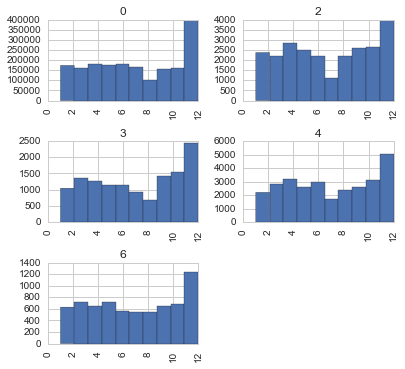

In [25]:

dataTotal.MES.hist(by=dataTotal.PUNTOS, figsize=(6, 6))


La distribucion de la retirada de puntos tiene en algo en comun en todos los casos, tal y como vimos en el apartado anterior con la distribición de los Importes, en el mes de Agosto se produce un bajon ( excepto en la retirada de 6 puntos), y empiezan a aumentar a partir de Agosto.

-----------
## Multas de Velocidad

Vamos a analizar los datos ahora relacionados con las multas de velocidad. 
Lo vamos a hacer de dos formas:  
1. A partir del fichero de datos, con respecto a los campos de VEL_CIRCULA y VEL_CIRCULA, que supone que marca en caso de multa de velocidad, a que velocidad iba el vehiculo y cual fue la velocidad a la que deberia haber ido.
2. A partir del tipo VELOCIDAD, que son aquellas multas donde el campo HECHO aparecen las palabras de VELOCID,  "CONDUCIR", "MAS DE 100 




In [26]:
dataTotal["DIFVEL"]=dataTotal["VEL_CIRCULA"]-dataTotal["VEL_LIMITE"]
MultasVelocidad=dataTotal[dataTotal["DIFVEL"]>0]
print "El Importe de Multas por Velocidad : " , MultasVelocidad["IMP_BOL"].sum()
print "La diferencia media de sobrepaso :", MultasVelocidad["DIFVEL"].mean()


El Importe de Multas por Velocidad :  12653000.0
La diferencia media de sobrepaso : 47.1298500753


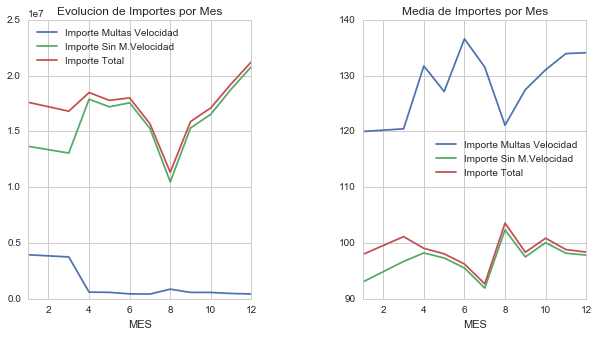

In [27]:
fig,axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5);

te = dataTotal.groupby("MES")
teSIN=dataTotal[dataTotal.DIFVEL==0].groupby("MES")
teCON=dataTotal[dataTotal.DIFVEL>0].groupby("MES")
totImportes = {
   'Importe Total': te["IMP_BOL"].sum(),
    'Importe Sin M.Velocidad': teSIN["IMP_BOL"].sum(),
    'Importe Multas Velocidad':teCON["IMP_BOL"].sum()
}
pImp=pd.DataFrame(totImportes)
pImp.plot(kind="line",  figsize=(10, 5), legend=True, ax=axes[0],title="Evolucion de Importes por Mes")

te = dataTotal.groupby("MES")
teSIN=dataTotal[dataTotal.DIFVEL==0].groupby("MES")
teCON=dataTotal[dataTotal.DIFVEL>0].groupby("MES")
totImportes = {
   'Importe Total': te["IMP_BOL"].mean(),
    'Importe Sin M.Velocidad': teSIN["IMP_BOL"].mean(),
    'Importe Multas Velocidad':teCON["IMP_BOL"].mean()
}
pImp1=pd.DataFrame(totImportes)
pImp1.plot(kind="line", legend=True, ax=axes[1],title="Media de Importes por Mes")



Suponiendo que cada vez que se pone una multa velocidad se indican bien los datos de velocidad de Circulacion y el limite, se ve que las multas de velocidad suponen muy poca cantidad en comparación con los importes por otros motivos. Sin embargo la media de las multas por velocidad es mucho mayor que el resto, por eso es la razón de que esas multas nos resultan mas "escandalosas"

A continuacion el mismo analisis, pero filtrando los datos por tipo = VELOCIDAD.

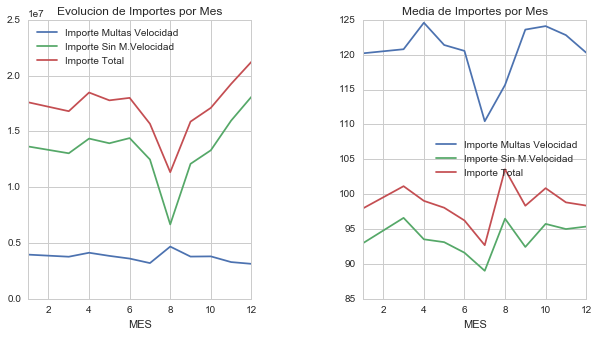

In [28]:
fig,axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5);

te = dataTotal.groupby("MES")
teSIN=dataTotal[dataTotal.TIPO!="VELOCIDAD"].groupby("MES")
teCON=dataTotal[dataTotal.TIPO=="VELOCIDAD"].groupby("MES")
totImportes = {
   'Importe Total': te["IMP_BOL"].sum(),
    'Importe Sin M.Velocidad': teSIN["IMP_BOL"].sum(),
    'Importe Multas Velocidad':teCON["IMP_BOL"].sum()
}
pImp=pd.DataFrame(totImportes)
pImp.plot(kind="line",  figsize=(10, 5), legend=True, ax=axes[0],title="Evolucion de Importes por Mes")

te = dataTotal.groupby("MES")
teSIN=dataTotal[dataTotal.TIPO!="VELOCIDAD"].groupby("MES")
teCON=dataTotal[dataTotal.TIPO=="VELOCIDAD"].groupby("MES")
totImportes = {
   'Importe Total': te["IMP_BOL"].mean(),
    'Importe Sin M.Velocidad': teSIN["IMP_BOL"].mean(),
    'Importe Multas Velocidad':teCON["IMP_BOL"].mean()
}
pImp1=pd.DataFrame(totImportes)
pImp1.plot(kind="line", legend=True, ax=axes[1],title="Media de Importes por Mes")

Existen diferencias con respecto a los graficos anteriores, donde hemos cogido los campos de VEL. Pero los datos nos dan la misma información, las multas de velocidad no suponen un % elevado en el total del Importe, aunque por el importe de una multa de Velocidad, la media sí que es bastante superior al resto.

In [29]:
MultasVelocidad.groupby(['LUGAR'],sort=False)['IMP_BOL'].sum().sort_values(ascending=False).head(20)

LUGAR
M-30 C-1 KM 6,700 CR3       1547400.0
A5 KM 4.0 SALIDA            1111500.0
M-30 FT K 04,150 CR4         996800.0
M-30 CALZADA 2 KM 27.000     751700.0
M-30 XC K 10,300 CR3         568800.0
M-30 C-2 KM 7,800 CR-IZD     543200.0
M-30 C-1 KM 0,500 CR-IZD     478600.0
M-30 C-1 KM 6,700 CR1        477800.0
M-30 XC K 19,06 CR4          456300.0
M-30 CALZADA 1 KM 25,700     392700.0
M-30 FT K 04,150 CR1         312800.0
M-30 C-1 KM 0,500 CR-CRA     290100.0
F062 O'DONNELL               265800.0
M-30 C-2 KM 7,800 CR-CRA     258300.0
M-30 NC K 14,200 CR3         256800.0
N139 PO SANTA MARIA CABE     245600.0
M-30 XC K 16,530 CR3         218300.0
M-30 XC K 16,530 CR2         186200.0
KM 7,3 AV MEDITERRANEO       145700.0
M-30 NC K 17,170 CR1         133400.0
Name: IMP_BOL, dtype: float64

Los datos de LUGAR no estan tipificados, y tienen numerosos errores. Pero, si que nos valen para ver cuales son los lugares donde mas multas de velocidad han puesto. Evidentemente son radares.

In [30]:
print dataTotal.groupby(['LUGAR'])['IMP_BOL'].sum().argmax()
print dataTotal[dataTotal.LUGAR=="A5 KM 4.0 SALIDA"]["IMP_BOL"].sum()

print dataTotal[dataTotal.LUGAR=="A5 KM 4.0 SALIDA"]["DENUNCIANTE"].unique()

A5 KM 4.0 SALIDA
4647500.0
['POLICIA MUNICIPAL']


Si no tengo en cuenta los datos de Velocidad para ver cual es el Lugar con mayor importe, salen datos diferentes, lo que me ofrece muchas dudas sobre la calidad del dato. En cualquier caso, me resulta curioso , he buscado este punto y he encontrado este video del 2009 https://www.youtube.com/watch?v=rD45iDvQhpk, que ya indicaba que este radar es el que mas coches multa. Pues despues de 6 años, esto sigue siendo así, la gente sigue "cayendo" en el mismo radar.


Podemos ver que parece que las multas por Radares se tipifican con DENUNCIANTE es POLICIA MUNICIPAL. Lo que explica el alto numero de multas de tipo VELOCIDAD para la POLICIA MUNICIPAL que veiamos en una de las graficas anteriores.

## Analisis de multas de Circulacion

Haciendo un poco de zoom en las multas por circulacion, he visto que el aumento de las multas es de las que tienen importe = 90, y son realizadas por el denunciante AGENTE DE MOVILIDAD. Si hago una tabla para ver la evolucion de esas multas por tramo horario obtengo este resultado.

In [31]:

visCir=dataTotal[(dataTotal.TIPO=="CIRCULACION") & (dataTotal.IMP_BOL==90) & (dataTotal.DENUNCIANTE=="AGENTES DE MOVILIDAD")]
totaCir=pd.crosstab([visCir.TRAMOHORA], [visCir.MES], values=visCir.IMP_BOL, aggfunc=[len])
totaCir

len                                                             \
MES            1       3       4       5       6       7     8      9     10   
TRAMOHORA                                                                      
00         1933.0  1828.0  2188.0  2510.0  2495.0  1638.0   NaN    NaN   NaN   
06          469.0   558.0   521.0   681.0   743.0   566.0   NaN    3.0   2.0   
08         1065.0  1254.0  1354.0  1363.0  1646.0  1190.0  13.0  151.0  52.0   
10         1567.0  1567.0  1343.0  1357.0  1390.0   799.0   4.0   27.0  27.0   
12         3692.0  3607.0  3745.0  3584.0  3673.0  2090.0  11.0   41.0  26.0   
14         3334.0  2974.0  2973.0  2849.0  2918.0  1803.0   4.0   11.0  12.0   
16         4089.0  3722.0  3838.0  3606.0  3762.0  2451.0   5.0   42.0  61.0   
18         5146.0  5565.0  7253.0  6634.0  6853.0  4409.0  20.0   75.0  76.0   
21         3080.0  2948.0  3554.0  3623.0  3934.0  3035.0   2.0    1.0   3.0   

                            
MES            11       12  
TRAMOHORA                   
00         3291.0   4608.0  
06         1888.0   2280.0  
08         6100.0   9272.0  
10         7131.0  12527.0  
12         6581.0  11692.0  
14         4903.0   7943.0  
16         5415.0   8510.0  
18         6539.0   9097.0  
21         4115.0   6457.0

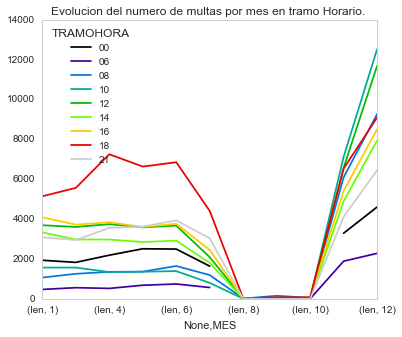

In [32]:

totaCir.T.plot(kind="line",  grid=False ,\
          cmap='nipy_spectral', figsize=(6, 5), legend=True, title="Evolucion del numero de multas por mes en tramo Horario. ")


En la tabla y en el grafico se puede ver que el numero de multas por tramo horario en noviembre y diciembre ha crecido en todos los tramos!. 
Sobre todo en los tramos de 10 y 12 de la mañana.  

Haciendo un zoom en los hechos para las multas para comparar el mes de MAYO con el mes de DICIEMBRE:

In [33]:
print "MAYO------"
print visCir[(visCir.TRAMOHORA=="12") & (visCir.MES==5) ].HECHO.count()
print visCir[(visCir.TRAMOHORA=="12") & (visCir.MES==5) ].HECHO.unique()
print "DICIEMBRE------"
print visCir[(visCir.TRAMOHORA=="12") & (visCir.MES==12) ].HECHO.count()
print visCir[(visCir.TRAMOHORA=="12") & (visCir.MES==12) ].HECHO.unique()

MAYO------
3584
[ 'NO RESPETAR LAS SE\xc3\x91ALES EN UNA V\xc3\x8dA DE CIRCULACI\xc3\x93N RESTRINGIDA O RESERVADA.'
 'NO RESPETAR LA SE\xc3\x91ALIZACI\xc3\x93N.'
 'CIRCULAR POR UN CARRIL DE CIRCULACI\xc3\x93N RESERVADA.'
 'NO RESPETAR LAS MARCAS VIALES DE CANALIZACI\xc3\x93N DEL TR\xc3\x81FICO.']
DICIEMBRE------
11692
[ 'NO RESPETAR LAS SE\xc3\x91ALES EN UNA V\xc3\x8dA DE CIRCULACI\xc3\x93N RESTRINGIDA O RESERVADA.'
 'CIRCULAR POR UN CARRIL DE CIRCULACI\xc3\x93N RESERVADA.'
 'NO RESPETAR LA SE\xc3\x91ALIZACI\xc3\x93N.'
 'PARAR EN UN CARRIL DE CIRCULACI\xc3\x93N']


El aumento de las multas para el mismo tramo horario es de casi 4 veces.. y sin embargo los HECHOS son  mas o menos los mismos, yo esperaba ver otros hechos que explicaran esto... voy a ver si el LUGAR nos da alguna pista.

In [34]:
#Lugar donde mas multas se ponian en MAYO
v1= visCir [(visCir.TRAMOHORA=="12") & (visCir.MES==5) ]
v1.groupby(['LUGAR'],sort=False)['IMP_BOL'].sum().sort_values(ascending=False).head(10)

LUGAR
PZ SANTA ANA 8            56880.0
PRADO 28                  42660.0
LOS MADRAZO 24            41400.0
FUCAR 24                  39600.0
RIBERA DE CURTIDORES 1    18090.0
MIGUEL SERVET 1           16470.0
PZ ANGEL 2                13140.0
CENICERO 13               12420.0
LOPE DE VEGA 34           11250.0
LEON 32                   10800.0
Name: IMP_BOL, dtype: float64

In [35]:
#Lugar donde mas multas se ponene en Diciembre.
v1= visCir [(visCir.TRAMOHORA=="12") & (visCir.MES==12) ]
v1.groupby(['LUGAR'],sort=False)['IMP_BOL'].sum().sort_values(ascending=False).head(10)

LUGAR
LEGANITOS 24       200160.0
STO. DOMINGO 1      87390.0
HILERAS 16          86760.0
MAYOR 77            75240.0
JACOMETREZO 2       54000.0
ARRIETA 17          52830.0
SAN MARTIN 2        44370.0
BOLA 6              41220.0
MAYOR 23            33300.0
MIGUEL SERVET 1     33120.0
Name: IMP_BOL, dtype: float64

Viendo estos datos, el numero de multas en Leganitos me parece brutal.. 
he buscado en la web, y me he encontrado con este articulo : http://www.elespanol.com/espana/20160210/101240182_0.html
donde indica que se van a anular todas las multas desde el 1 de noviembre del 2015 el febrero del 2016, porque hubo un error informatico..  con lo cual, por fin hemos encontrado explicacion al aumento de las multas de Circulacion en los meses de Noviembre y Diciembre, no se trataba del aumento de turismo, de afan recaudatorio, o que de repente los madrileños se olvidaran de las normas de circulación, fue un error "informatico".    
Este error informatico, hace que los analisis anteriores no sean buenos, porque los datos estan desvirtuados :-(

## Detalle de Multas por Estacionamiento.

In [36]:
visEST=dataTotal[(dataTotal.TIPO=="ESTACIONAR")]
print visEST.groupby(['LUGAR'],sort=False)['IMP_BOL'].sum().sort_values(ascending=False).head(15)
print "El importe total de Estacionamiento es ", visEST.IMP_BOL.sum()

LUGAR
AEROPUERTO SALIDA T 4     261450.0
AEROPUERTO SALIDA T 1     257610.0
AEROPUERTO LLEGADA T 1    232960.0
ARZOBISPO MORCILLO 1      183030.0
GT S.A.FLORIDA S/N        163920.0
CASTELLANA 142            122470.0
CASTELLANA 259            120570.0
AV MEN. PELAYO 14         112060.0
PEDRO RICO 4              111330.0
M.BARTO.COSSIO S/N        110330.0
MENDEZ ALVARO 70          108230.0
DR FDO C RGUEZ S/N        103970.0
PEDRO RICO                 87520.0
R COMUNICACION S/N         86800.0
MENDEZ ALVARO 78           83720.0
Name: IMP_BOL, dtype: float64
El importe total de Estacionamiento es  109050260.0


Por las cifras, vemos que donde mas multan ponen es en el Aeropuerto, pero los importes del Aeropuerto no suponen ni el 1% del total, con lo que las multas de SER estan muy repartidas por todo Madrid.

## Detalle de Multas por Semaforo.

In [37]:
visSem=dataTotal[(dataTotal.TIPO=="SEMAFORO")]
totaCir=pd.crosstab([visSem.DENUNCIANTE], [visSem.MES], values=visSem.IMP_BOL, aggfunc=[np.sum])
totaCir

sum                                          \
MES                         1         3         4         5         6    
DENUNCIANTE                                                              
AGENTES DE MOVILIDAD  204690.0  293200.0  362600.0  270600.0  364960.0   
POLICIA MUNICIPAL      86150.0  101660.0   90460.0   95640.0   88100.0   

                                                                        \
MES                         7         8         9         10        11   
DENUNCIANTE                                                              
AGENTES DE MOVILIDAD  183600.0  268600.0  263600.0  333490.0  256980.0   
POLICIA MUNICIPAL      85790.0   61980.0   92260.0  108560.0   98250.0   

                                
MES                         12  
DENUNCIANTE                     
AGENTES DE MOVILIDAD  263980.0  
POLICIA MUNICIPAL      96680.0

In [38]:
visSem.groupby(['LUGAR'],sort=False)['IMP_BOL'].sum().sort_values(ascending=False).head(10)

LUGAR
PO CASTELLANA 105                 392800.0
AV MEDITERRANEO 32                314400.0
AV ILUSTRACION ESQ BETANZOS       242600.0
FRANCISCO SILVELA 62              220400.0
AV FILIPINAS 18                   181600.0
SINESIO DELGADO GTA P. CEBRERO    169200.0
FCO PI Y MARGALL ESQ ANA AUST     137800.0
PO CASTELLANA 167                 135200.0
FTE CARRANTONA ESQ HAC.PAVONES    123600.0
AV VENTISQUERO CONDESA 42         121600.0
Name: IMP_BOL, dtype: float64

Las multas que provienen de camaras en los semaforos, tampoco las tenemos identificadas como tal, vienen identificadas como AGENTES DE MOVILIDAD.
Las Camaras que mas recaudan son las que se muestran arriba.. De hecho he buscado en internet, y he llegado a este articulo http://www.abc.es/espana/madrid/abci-semaforo-santiago-bernabeu-mayor-expendedor-multas-201602012310_noticia.html, y http://www.motorpasion.com/seguridad/como-funcionan-los-semafaros-con-camara-que-multan-en-madrid-y-por-que-estan-en-entredicho

###  Multas con mas Importe

In [39]:
print "Importe maximo de multas :", dataTotal.IMP_BOL.max()
print "Hay :" ,dataTotal[dataTotal.IMP_BOL==dataTotal.IMP_BOL.max()]["TIPO"].count(), "Multas de ese importe"
print "El tipo de la multa es ", dataTotal[dataTotal.IMP_BOL==dataTotal.IMP_BOL.max()]["TIPO"].unique()
print "La calificacion de la multa es ", dataTotal[dataTotal.IMP_BOL==dataTotal.IMP_BOL.max()]["CALIFICACION"].unique()

print "El detalle de los hechos : ", dataTotal[dataTotal.IMP_BOL==dataTotal.IMP_BOL.max()]["HECHO"].unique()
print "Puntos  : ", dataTotal[dataTotal.IMP_BOL==dataTotal.IMP_BOL.max()]["PUNTOS"].unique()

Importe maximo de multas : 1000.0
Hay : 4191 Multas de ese importe
El tipo de la multa es  ['DROGAS']
La calificacion de la multa es  ['MUY GRAVE']
El detalle de los hechos :  [ 'CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMITIDA SUPERIOR A 0.50 MG/L EN AIRE EXPIRADO.'
 'INCUMPLIR LA OBLIGACI\xc3\x93NDE SOMETERSE A LAS PRUEBAS DE DETECCI\xc3\x93N DE ALCOHOL O DE PRESENCIADE DROGAS EN EL ORGANISMO.'
 'CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.'
 'CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMITIDA SUPERIOR A 0.50 MG/L EN AIRE ESPIRADO.']
Puntos  :  [6 0]


Siendo todas multas con un importe de 1000 euros, siendo todas MUY GRAVES, me llama la atención que en algun caso no haya perdida de puntos en el carnet.

In [40]:
print "Numero de multas con 0 puntos :", dataTotal[ (dataTotal.IMP_BOL==dataTotal.IMP_BOL.max()) & (dataTotal.PUNTOS==0)].PUNTOS.count()


Numero de multas con 0 puntos : 85


In [41]:
print "Hechos de multas con 0 puntos :", dataTotal[ (dataTotal.IMP_BOL==dataTotal.IMP_BOL.max()) & (dataTotal.PUNTOS==0)].HECHO.unique()


Hechos de multas con 0 puntos : [ 'CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMITIDA SUPERIOR A 0.50 MG/L EN AIRE EXPIRADO.'
 'CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANISMO.'
 'CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMITIDA SUPERIOR A 0.50 MG/L EN AIRE ESPIRADO.'
 'INCUMPLIR LA OBLIGACI\xc3\x93NDE SOMETERSE A LAS PRUEBAS DE DETECCI\xc3\x93N DE ALCOHOL O DE PRESENCIADE DROGAS EN EL ORGANISMO.']


Con lo que volvemos a sospechar de la calidad del dato de este fichero o la objetividad al poner la multa,  me resultaria muy extraño que para mismo importes, mismos hechos, en unos casos haya retirada de puntos y en otros no.

### Tipo Estacionamiento calificado como Muy GRAVE

In [42]:
pp=dataTotal[(dataTotal.CALIFICACION=="MUY GRAVE") & (dataTotal.TIPO=="ESTACIONAR")]
print pp["HECHO"].unique()
dataTotal[(dataTotal.CALIFICACION=="MUY GRAVE") & (dataTotal.TIPO=="ESTACIONAR")].T


[ 'CONDUCCION TEMERARIA: CONDUCIR A GRAN VELOCIDAD REALIZANDO ZIG ZAG Y ESTACIONA'
 'CONDUCCION TEMERARIA: REALIZAR TROMPOS EN APARCAMIENTO ENTRE VHOS ESTACIONADOS'
 'CONDUCCION TEMERARIA: REALIZAR GROMPOS EN ZONA DE ESTACIONAMIENTO'
 'CONDUCCION TEMERARIA: REALIZAR TROMPOS ENTRE VEHICULOS EN ZONA ESTACIONAMIENTO']


,532869,678126,901223,1040376
CALIFICACION,MUY GRAVE,MUY GRAVE,MUY GRAVE,MUY GRAVE
LUGAR,PO GIGANTES Y CABEZUDOS 30,LEONARDO PRIETO CASTRO 51,AYERBE SN,AYERBE SN
MES,5,5,7,7
ANIO,2015,2015,2015,2015
HORA,05:58,20:45,09:10,09:10
IMP_BOL,500,500,500,500
DESCUENTO,SI,SI,SI,SI
PUNTOS,6,6,6,6
DENUNCIANTE,POLICIA MUNICIPAL,POLICIA MUNICIPAL,POLICIA MUNICIPAL,POLICIA MUNICIPAL
HECHO,CONDUCCION TEMERARIA: CONDUCIR A GRAN VELOCIDA...,CONDUCCION TEMERARIA: REALIZAR TROMPOS EN APAR...,CONDUCCION TEMERARIA: REALIZAR GROMPOS EN ZONA...,CONDUCCION TEMERARIA: REALIZAR TROMPOS ENTRE V...


Estos  casos se han tipificado erroneamente como ESTACIONAMIENTO, debido a que aparece dicha palabra. 
El caso es que hacer trompos en estacionamiento supone la perdida de 6 puntos y una multa de 500 euros.

### Multas de Estacionar Nocturnas

Antes hemos visto, que habia multas por estacionamiento en horarios donde SER no trabajaba, vamos a verlo.

In [43]:
vista=dataTotal[(dataTotal.TIPO=="ESTACIONAR") & ((dataTotal.TRAMOHORA=="00") | \
                                                  (dataTotal.TRAMOHORA=="06") | (dataTotal.TRAMOHORA=="21"))]


vista.HECHO.unique()[1:10] #Solo muestro en el ejercicio las 10 primeras.

array(['ESTACIONAR EN CARRIL DE CIRCULACION.',
       'ESTACIONAR EN MEDIO DE LA CALZADA.',
       'ESTACIONAR EN CARRIL RESERVADO PARA USO, PARADA O ESTACIONAMIENTO EXCLUSIVO DEL TRANSPORTE P\xc3\x9aBLICO URBANO.',
       'ESTACIONAR EN INTERSECCI\xc3\x93N.',
       'ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVEMENTE EL TR\xc3\x81NSITO DE PEATONES.',
       'ESTACIONAR OBSTACULIZANDO LA UTILIZACI\xc3\x93N DE UN VADO SE\xc3\x91ALIZADO CORRECTAMENTE Y EN ACCESOS A INMUEBLES.',
       'PARAR EN DOBLE FILA.', 'ESTACIONAR EN DOBLE FILA.',
       'ESTACIONAR OBSTACULIZANDO LA UTILIZACI\xc3\x93N NORMAL DE UNPASO DE PEATONES.'], dtype=object)

De este tipo de Multas nocturnas, me resultan curiosas las siguientes:
      * 'CONDUCCION NEGLIGENTE: ESTACIONAR SIN FRENO DE MANO DESPLAZANDOSE EL VHO', !!!!!
      *  'ESTACIONAR EN SENTIDO CONTRARIO AL SENTIDO DE LA MARCHA.',
      *  'ESTACIONAR VEHICULO DE DOS RUEDAS EN PLAZA, ZONA AJARDINADA O CALLE PEATONAL SIN SEÑALIZACION QUE LO AUTORICE.',
      *  ESTACIONAR DIFICULTANDO GRAVEMENTE EL TRANSITO DE PEATONES.',
      * 'ESTACIONAR EN ZONA PEATONAL OBSTACULIZANDO GRAVEMENTE EL TRANSITO DE PEATONES.',
      * 'ESTACIONAR OBSTACULIZANDO LA UTILIZACION DE ZONAS O PASOS REBAJADOS.',
      * 'ESTACIONAR MOTOCICLETA O CICLOMOTOR SOBRE LA ACERA OBSTACULIZANDO EL TRANSITO DE PEATONES.',
      * 'ESTACIONAR EN LUGAR DONDE SE IMPIDE LA VISIBILIDAD DE LAS SEÑALES DE TRAFICO.',
      * 'ESTACIONAR REMOLQUE SEPARADO DEL VEHICULO TRACTOR QUE LO ARRASTRA.',
      * 'EN ACERAS DE ANCHURA SUPERIOR A 6 MTS ESTACIONAR VEHICULOS DE 2 RUEDAS DE FORMA ANTIRREGLAMENTARIA.',



In [44]:
vista.IMP_BOL.unique()

array([  90.,  200.,   60.,   30.,  500.])

In [45]:
#Vamos a ver por ejemplo las que contienen la palabra MOTOCICLETA
vista[vista.HECHO.str.contains("MOTOCICLETA")].HECHO.unique()

array([ 'ESTACIONAR MOTOCICLETA O CICLOMOTOR SOBRE LA ACERA OBSTACULIZANDO EL TR\xc3\x81NSITO DE PEATONES.',
       'ESTACIONAR MOTOCICLETA O CICLOMOTOR SOBRE LA ACERA OBSTACULIZANDO GRAVEMENTE EL TR\xc3\x81NSITO DE PEATONES.'], dtype=object)

In [46]:
vista[vista.HECHO.str.contains("MOTOCICLETA")].IMP_BOL.unique()

array([  30.,  200.])

Volvemos a encontrar discrepancias, por el mismo HECHO, unas veces la multa es de 30 euros y otra de 200 euros.

In [47]:
V2=vista[vista.HECHO.str.contains("MOTOCICLETA")]
print "Lugares donde estacionar la Moto en la acera por la noche cuesta 30 Euros"
print V2[V2.IMP_BOL==30].LUGAR.unique()

print "----------------------"
print "Lugares donde estacionar la Moto en la acera por la noche cuesta 200 Euros"
print V2[V2.IMP_BOL==200].LUGAR.unique()


Lugares donde estacionar la Moto en la acera por la noche cuesta 30 Euros
['ELVIRA 6' 'CRUZ VERDE FTE 4' 'ANDRES BORREGO FTE 6'
 'ANDRES BORREGO FTE 14' 'ANDRES BORREGO FTE 18' 'REINA 33'
 'GOYA PALACIO DE DEPORTES' 'REINA 31' 'CAVA BAJA 23' 'CAVA BAJA 30'
 'CAVA BAJA 29' 'CAVA BAJA 39' 'JORGE JUAN-LOMBIA' 'AEROPUERTO LLEGADA T 1'
 'MAIQUEZ-JORGE JUAN' 'MORERIA 6' 'PO PUERTA DEL ANGEL FAROLA 8' 'ZAIDA 75'
 'PANTOJA-JAVIER FERRERO' 'GOYA-LOMBIA' 'AV C BARCELONA S/N' 'REINA FTE 39'
 'SILFIDE 4' 'NARVAEZ 40' 'TOPETE 6' 'SERRANO 190' 'FERROVIARIOS 22'
 'ALEJANDRO DUMAS-PO PONTONES' 'ALEJANDRO DUMAS FAROLA 18'
 'ALEJANDRO DUMAS FAROLA 19' 'MAYOR 65' 'PUEBLA FTE 15' 'PUEBLA 15'
 'LOPE DE VEGA 3' 'MANCEBOS 14' 'MANCEBOS FTE 14' 'MEDIODIA CHICA 3'
 'SANTA BARBARA 8' 'VILLAVICIOSA 2' 'ESTACION ATOCHA AVE SN' 'FUENCARRAL']
----------------------
Lugares donde estacionar la Moto en la acera por la noche cuesta 200 Euros
['LIBERTAD-SAN MARCOS' 'LIBERTAD 16' 'PO CASTELLANA F 232' 'PELICANO 3'
 'REI

Por los datos, da la impresion que dependiendo de la calle donde se comete la infraccion, el importe varia.

###  Curiosidades :  Comer y Dormirse...

A estas persona les pusieron una multa de 200 € por comer mientras conducen, ambas tipificadas como incidencias GRAVES.

In [48]:
gus=dataTotal[dataTotal.HECHO.str.contains("GUSANITOS")]
print gus.HECHO.unique()
gus

[ 'CONDUCCION NEGLIGENTE: USAR LAS DOS MANOS PARA COMER UNA BOLSA DE GUSANITOS']


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO,VEL_LIMITE,VEL_CIRCULA,DHORA,TIPO,TRAMOHORA,DIFVEL
1163095,GRAVE,AV ENTREVIAS,8,2015,20:10,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: USAR LAS DOS MANOS PARA...,0,0,2016-01-01 20:10:00,CIRCULACION,18,0


In [49]:
gus=dataTotal[dataTotal.HECHO.str.contains("BOCADILLO")]
print gus.HECHO.unique() 
gus

['CONDUCCION NEGLIGENTE: COMIENDO MIENTRAS CONDUCE UN BOCADILLO']


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO,VEL_LIMITE,VEL_CIRCULA,DHORA,TIPO,TRAMOHORA,DIFVEL
1486090,GRAVE,"M 30 KM 19,500 CALZADA 1",10,2015,16:50,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: COMIENDO MIENTRAS CONDU...,0,0,2016-01-01 16:50:00,CIRCULACION,16,0


In [50]:
gus=dataTotal[dataTotal.HECHO.str.contains("DESCALZO")]
print gus.HECHO.unique() 
gus

['CONDUCCION NEGLIGENTE: CONDUCIR DESCALZO']


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO,VEL_LIMITE,VEL_CIRCULA,DHORA,TIPO,TRAMOHORA,DIFVEL
879984,GRAVE,VIRIDIANA-AV PABLO NERUDA,6,2015,01:20,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: CONDUCIR DESCALZO,0,0,2016-01-01 01:20:00,VELOCIDAD,00,0


In [51]:
gus=dataTotal[dataTotal.HECHO.str.contains("CONDUCE SOSTENIENDO EL CAFE EN UNA MANO")]
print gus.HECHO.unique() 
gus



[ 'CONDUCCION NEGLIGENTE: CONDUCE SOSTENIENDO EL CAFE EN UNA MANO Y EN OTRA MOVIL']


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO,VEL_LIMITE,VEL_CIRCULA,DHORA,TIPO,TRAMOHORA,DIFVEL
889800,GRAVE,MAYOR 59,6,2015,12:15,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: CONDUCE SOSTENIENDO EL ...,0,0,2016-01-01 12:15:00,CIRCULACION,12,0


In [52]:
#Unos cuantos que se quedan dormidos.
gus=dataTotal[dataTotal.HECHO.str.contains("DORMIDO")]
print gus.HECHO.unique() 
gus

[ 'CONDUCCION NEGLIGENTE: CIRCULAR EN ZIG ZAG Y QUEDARSE DORMIDO EN SEMAFORO'
 'CONDUCCION NEGLIGENTE: DORMIDO EN VEHICULO Y NO RESPONDE'
 'CONDUCCION NEGLIGENTE: SE QUEDA DORMIDO APROVECHANDO LA FASE ROJA DEL SEMAFORO']


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO,VEL_LIMITE,VEL_CIRCULA,DHORA,TIPO,TRAMOHORA,DIFVEL
691,GRAVE,AV CONSEJO DE EUROPA 2,1,2015,08:55,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: CIRCULAR EN ZIG ZAG Y Q...,0,0,2016-01-01 08:55:00,SEMAFORO,08,0
1037244,GRAVE,PO PRADO-PZ CANOVAS CASTILLO,7,2015,05:50,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: DORMIDO EN VEHICULO Y N...,0,0,2016-01-01 05:50:00,CIRCULACION,00,0
1324110,GRAVE,AV ALBERTO ALCOCER-PO HABANA,9,2015,00:15,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: SE QUEDA DORMIDO APROVE...,0,0,2016-01-01 00:15:00,SEMAFORO,00,0


In [53]:
#Conducir con BEBE en las rodilla, castigos distintos.
gus=dataTotal[dataTotal.HECHO.str.contains("BEBE")]
print gus.HECHO.unique() 
gus

[ 'CONDUCCION TEMERARIA: CONDUCIR CON UN BEBE DE MESES ENTRE VOLANTA Y BRAZOS'
 'CONDUCCION NEGLIGENTE: CONDUCIR CON UN BEBE EN SUS RODILLAS']


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO,VEL_LIMITE,VEL_CIRCULA,DHORA,TIPO,TRAMOHORA,DIFVEL
521319,MUY GRAVE,CARBONERAS 6,4,2015,21:10,500.0,SI,6,POLICIA MUNICIPAL,CONDUCCION TEMERARIA: CONDUCIR CON UN BEBE DE ...,0,0,2016-01-01 21:10:00,VELOCIDAD,21,0
891078,GRAVE,VIÑEDOS SN,6,2015,09:10,200.0,SI,0,POLICIA MUNICIPAL,CONDUCCION NEGLIGENTE: CONDUCIR CON UN BEBE EN...,0,0,2016-01-01 09:10:00,VELOCIDAD,08,0


---------

<font size=3>
En resumen, aunque los datos no estan tipificados y es laborioso extraer información, podemos ver que existen muchos mecanimos "automaticos" o de control desde donde se pueden poner multas :  Radares, Camaras en los semaforos y luego los estacionamiento regulados por "SER".

<br><br>

Ademas de esto, esta la Policia Municipal, y el cuerpo de refuerzo llamado Agentes de Movilidad, para controlar a los conductores (incluidos las bicicletas). 
<br><br>

Un hecho a tener en cuenta, es que cuando la multa se realiza por la Policia Municipal o por los Agentes, no parece haber en ciertas multas, criterios claros en cuanto al numero de puntos o importe economico de la multa.

<br><br>

Por otro lado, debido al error "informatico" detectado por el Ayuntamiento que hizo crecer el numero de multas de Circulacion en los meses de Noviembre a Diciembre,  invalidan en parte los resultados del analisis, porque dejan en evidencia la calidad del dato.

<br><br>

¿ Existe espiritu recaudatorio del Ayuntamiento o simplemente se aprovecha del hecho de que hay muchos conductores que no respetan las normas de circulación y no son civicos con los demas?  En mi opinión, si aun teniendo la información y los avisos en cuanto a radares, semaforos, avisos de  estacionamientos... se recauda esta cantidad de dinero...  si no se hiciera nada, la circulación por Madrid seria una verdadera jungla..  


</font>